In [1]:
import scanpy as sc
import numpy as np
import mudi as md

/home/sanand/anaconda3/envs/renv/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


### Example Usage

Demonstrating `mudi` on the `pbmc3k` dataset.

In [2]:
adata = sc.datasets.pbmc3k()

## Recipe

`mudi.recipe` is the main pre-processing engine with the following features:
* __flexible inputs__: it can take a single Anndata, a list of Anndatas, or a single file-name (.h5 or .mtx dir), or a list of file-names; it will then concatenate these objects and automatically assign them to a batch
* __dynamic filtering__: will filter out bad barcodes by course clustering to not bias towards specific cell-types
    * `thresh`: std. dev threshold per grouping
    * `groups`: groups to use for filtering; by default, assumes only `percent_mito` is used (ex. one could also add `n_genes`
    * `mito_thresh`: a hard cutoff for mitochondrial filtering
* __normalization wrapper__: will automatically normalize either with standard library norm or if passed `norm='scran'`, it will wrap scran
* __doublets__: wraps `scrublet` to compute doublets
* __cell-cycle scoring__: computes cell-cycle scores
* __light-weight batch correction__: allows light-weight batch correction using `bbknn`
* __downstream processing__: standard pca, neighbors, louvain, umap

In [3]:
adata = md.recipe(
    adata,
    min_genes=200,
    min_cells=3,
    thresh=1.75,
    mito_thresh=None,
    verbose=True
)

	Filtering louvain group 2 - percent_mito < 0.03154836967587471
	Filtering louvain group 3 - percent_mito < 0.047272084979340434
	Filtering louvain group 0 - percent_mito < 0.03964273538440466
	Filtering louvain group 6 - percent_mito < 0.039234081748872995
	Filtering louvain group 1 - percent_mito < 0.04667235352098942
	Filtering louvain group 4 - percent_mito < 0.03999753319658339
	Filtering louvain group 7 - percent_mito < 0.029138509882614017
	Filtering louvain group 8 - percent_mito < 0.043241834500804543
	Filtering louvain group 5 - percent_mito < 0.055335435550659895
Filtered 114 / 2700 barcodes by percent_mito.


... storing 'batch' as categorical
... storing 'phase' as categorical


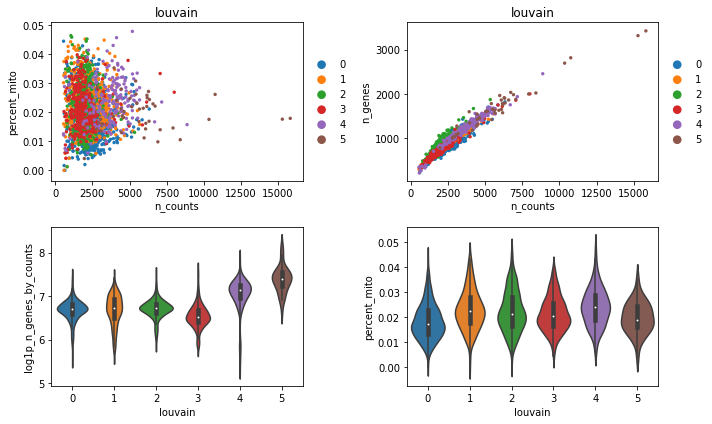

In [4]:
md.pl.adata_qc(adata, color_by='louvain')

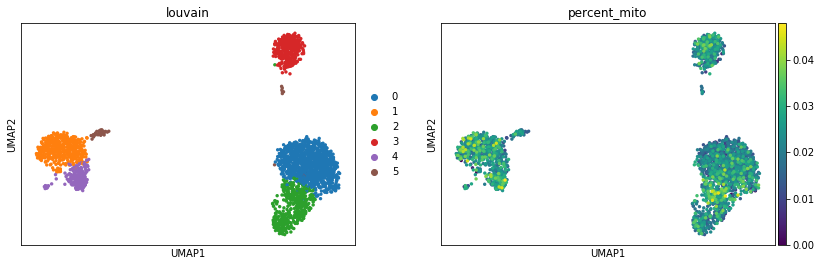

In [5]:
sc.pl.umap(adata, color=['louvain', 'percent_mito'])

### Normalizing Using Scran

In [6]:
adata = sc.datasets.pbmc3k()

In [7]:
adata = md.recipe(
    adata,
    min_genes=200,
    min_cells=3,
    thresh=1.75,
    mito_thresh=None,
    verbose=True,
    norm='scran'
)

	Filtering louvain group 2 - percent_mito < 0.03154836967587471
	Filtering louvain group 3 - percent_mito < 0.047272084979340434
	Filtering louvain group 0 - percent_mito < 0.03964273538440466
	Filtering louvain group 6 - percent_mito < 0.039234081748872995
	Filtering louvain group 1 - percent_mito < 0.04667235352098942
	Filtering louvain group 4 - percent_mito < 0.03999753319658339
	Filtering louvain group 7 - percent_mito < 0.029138509882614017
	Filtering louvain group 8 - percent_mito < 0.043241834500804543
	Filtering louvain group 5 - percent_mito < 0.055335435550659895
Filtered 114 / 2700 barcodes by percent_mito.


... storing 'batch' as categorical
... storing 'phase' as categorical


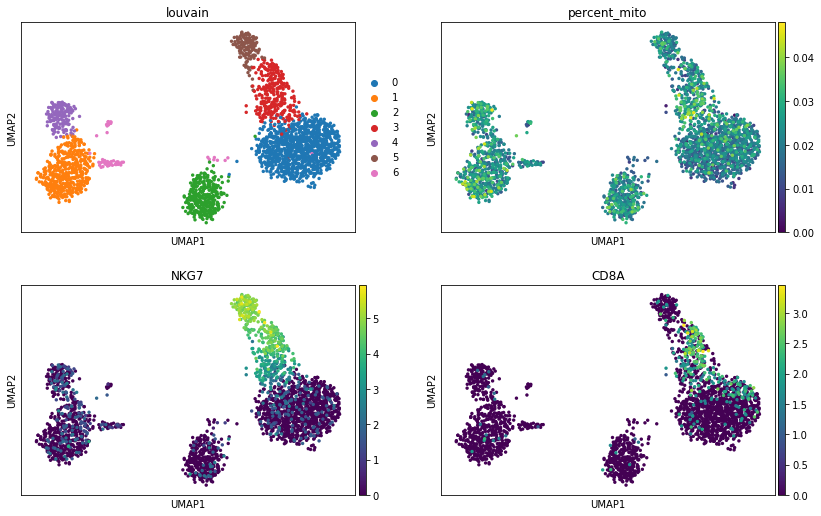

In [8]:
sc.pl.umap(adata, color=['louvain', 'percent_mito', 'NKG7', 'CD8A', ], ncols=2)